In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
cd D:\FINGERTIPS DATA SCIENCE\READING MATERIALS\PROJECTS\PYTHON_ML\PROJECT-7 Python KNN Classification Loan Applicant Risk Classification

D:\FINGERTIPS DATA SCIENCE\READING MATERIALS\PROJECTS\PYTHON_ML\PROJECT-7 Python KNN Classification Loan Applicant Risk Classification


# Part-1: Data Exploration and Pre-processing

In [4]:
# 1) load the given dataset
df=pd.read_excel("Python_Project_7_KNN.xlsx")

In [5]:
df.head()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
0,40.50,2,6,0.842666,594,0,0
1,41.25,5,2,0.791667,754,0,0
2,39.50,5,2,0.727273,779,0,0
3,35.00,1,4,0.820232,818,0,0
4,34.00,3,3,0.455581,853,0,1


In [29]:
df.shape

(8995, 7)

In [30]:
df.columns

Index(['Age', 'Total Work Experience', 'Number of years in city',
       'Cost to Request Ratio', 'Cibil score', 'Overdrafts past12months',
       'Total bounces past12months'],
      dtype='object')

In [7]:
# 2) Check for the null values
df.isnull().sum()

Age                           0
Total Work Experience         0
Number of years in city       0
Cost to Request Ratio         0
Cibil score                   0
Overdrafts past12months       0
Total bounces past12months    0
dtype: int64

In [8]:
# 3) Get basic information from data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         8995 non-null   float64
 1   Total Work Experience       8995 non-null   int64  
 2   Number of years in city     8995 non-null   int64  
 3   Cost to Request Ratio       8995 non-null   float64
 4   Cibil score                 8995 non-null   int64  
 5   Overdrafts past12months     8995 non-null   int64  
 6   Total bounces past12months  8995 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 492.0 KB


In [9]:
# 4) Describe the dataset
df.describe()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
count,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000
mean,38.808202,2.131073,4.288160,0.831183,752.626570,0.322068,1.162757
std,10.203371,0.892141,1.269416,0.490216,67.645792,0.914998,2.352798
min,18.100000,1.000000,1.000000,0.008466,351.000000,0.000000,0.000000
25%,30.830000,1.000000,3.000000,0.662147,730.000000,0.000000,0.000000
50%,37.200000,2.000000,4.000000,0.800000,768.000000,0.000000,0.000000
75%,45.400000,3.000000,5.000000,0.930908,797.000000,0.000000,1.000000
max,83.800000,5.000000,6.000000,12.006623,882.000000,12.000000,12.000000


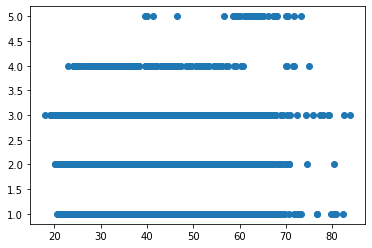

In [12]:
# 5) Display scatterplot between age & Total work Experience
plt.xlabel="Age"
plt.ylabel="Total Work Experience"

plt.scatter("Age","Total Work Experience",data=df)
plt.show()

<AxesSubplot:>

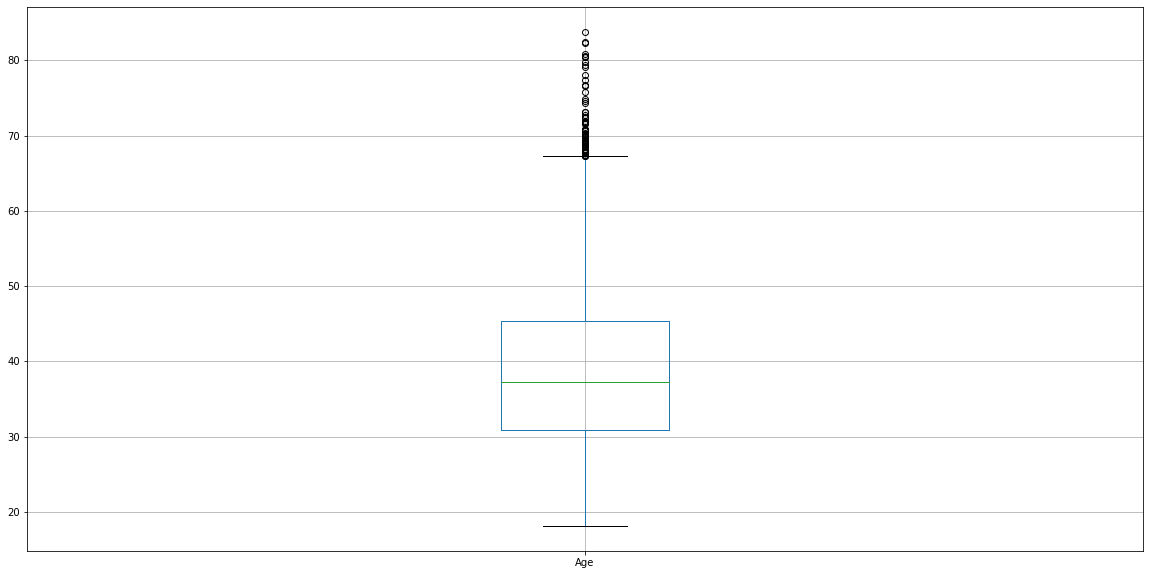

In [19]:
# 6) Display box plot for age
df.boxplot("Age",figsize=(20,10))

In [28]:
df.Age.unique()

array([40.5 , 41.25, 39.5 , ..., 57.2 , 65.11, 19.2 ])

<AxesSubplot:>

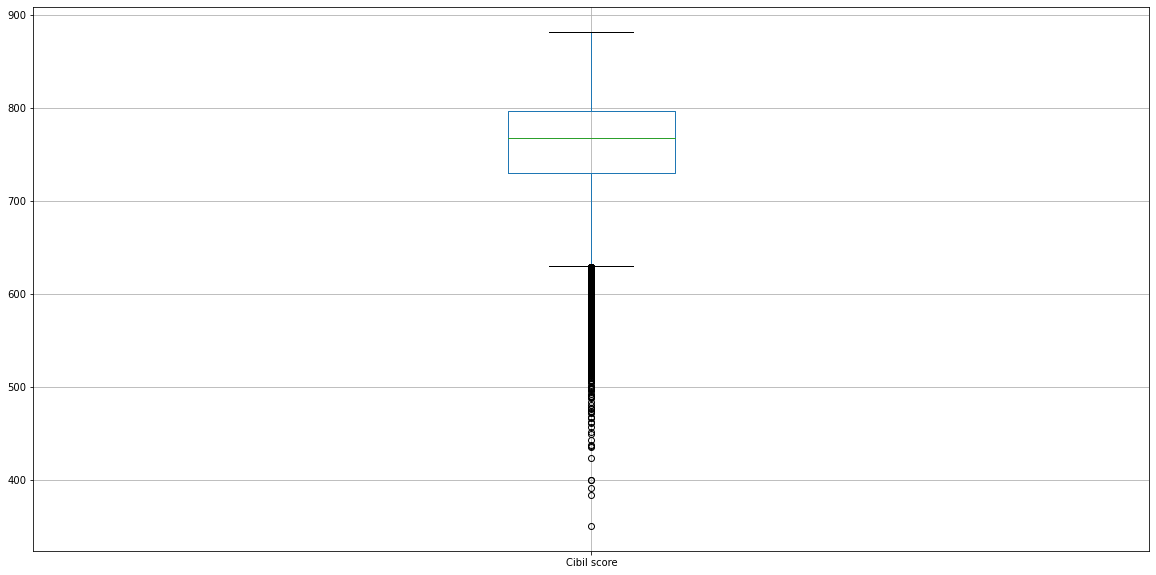

In [23]:
# 7) Display box plot for Cibil score
df.boxplot("Cibil score",figsize=(20,10))

In [25]:
df["Cibil score"].unique()

array([594, 754, 779, 818, 853, 777, 837, 738, 714, 788, 826, 836, 763,
       789, 764, 752, 663, 593, 731, 776, 840, 693, 784, 808, 857, 572,
       817, 661, 803, 675, 737, 739, 791, 712, 800, 740, 741, 725, 605,
       786, 801, 709, 546, 792, 769, 563, 825, 770, 848, 713, 774, 539,
       766, 756, 781, 804, 498, 767, 820, 684, 748, 772, 831, 815, 619,
       758, 521, 798, 785, 802, 727, 787, 730, 656, 614, 673, 806, 588,
       755, 761, 624, 723, 852, 686, 724, 587, 522, 609, 749, 530, 726,
       793, 578, 795, 783, 643, 575, 707, 844, 850, 811, 746, 771, 807,
       863, 635, 778, 523, 782, 744, 834, 728, 617, 735, 760, 762, 830,
       822, 773, 833, 805, 720, 745, 842, 672, 768, 627, 566, 622, 765,
       810, 750, 715, 718, 751, 630, 719, 839, 704, 702, 871, 743, 736,
       821, 548, 809, 757, 733, 639, 703, 832, 597, 682, 721, 823, 824,
       742, 797, 585, 812, 794, 828, 634, 580, 796, 855, 799, 519, 700,
       827, 816, 665, 759, 655, 775, 657, 734, 729, 859, 835, 67

In [34]:
# 8) Create target and features data where target is Total bounces past12months
x=df.drop("Overdrafts past12months",axis=1)
y=df["Overdrafts past12months"]

In [37]:
x
x.shape

(8995, 6)

In [38]:
y
y.shape

(8995,)

# Part-2: Working with Model


In [192]:
# 1) Split data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=200)

In [193]:
x_train
x_train.shape

(7196, 6)

In [194]:
x_test
x_test.shape

(1799, 6)

In [195]:
y_train
y_train.shape

(7196,)

In [196]:
y_test
y_test.shape

(1799,)

In [197]:
# 2) Create a KNN classifier between Features and target data
knn = KNeighborsClassifier()

In [198]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [199]:
y_predicted=knn.predict(x_test)
y_predicted

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [200]:
# 3) Display the test score
knn.score(x_train,y_train)

0.8568649249583101

In [201]:
# 4) Display the training score
knn.score(x_test,y_test)

0.8326848249027238

In [202]:
# 5) Print the accuracy score
print("Accuracy Score = {0:.02f}".format(accuracy_score(y_test,y_predicted)))

Accuracy Score = 0.83


In [203]:
# 6) Try 1 to 14 k values for classifier
train_scores=[]
test_scores=[]

for i in range(1,15):
    knn=KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
   
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))

        
    

In [204]:
# 7) Display training and testing score for all the 1 to 14 k values
train_scores

[1.0,
 0.8811839911061701,
 0.8806281267370761,
 0.8575597554196775,
 0.8568649249583101,
 0.8458866036687048,
 0.8486659255141745,
 0.8419955530850473,
 0.8419955530850473,
 0.8371317398554753,
 0.8354641467481935,
 0.8321289605336298,
 0.8306003335186215,
 0.8303224013340745]

In [205]:
test_scores

[0.7976653696498055,
 0.8276820455808782,
 0.8299055030572541,
 0.8382434685936632,
 0.8326848249027238,
 0.8382434685936632,
 0.8371317398554753,
 0.8371317398554753,
 0.8382434685936632,
 0.8382434685936632,
 0.8315730961645359,
 0.8354641467481935,
 0.8365758754863813,
 0.8382434685936632]

In [206]:
knn=KNeighborsClassifier(14)

In [207]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=14)

In [208]:
knn.score(x_train,y_train)

0.8303224013340745

In [209]:
knn.score(x_test,y_test)

0.8382434685936632

In [213]:
import warnings
warnings.filterwarnings("ignore")

In [215]:
from sklearn.metrics import classification_report

In [216]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1470
           1       0.43      0.29      0.34       251
           2       0.40      0.06      0.11        33
           3       0.00      0.00      0.00        17
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         1

    accuracy                           0.83      1799
   macro avg       0.16      0.12      0.12      1799
weighted avg       0.79      0.83      0.80      1799

